In [1]:
#Step 01: Import Libraries
# Algebra 
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For Statistical
from sklearn.svm import SVC
from sklearn import datasets
import pandas as pd

In [2]:
# Step 02: Value Define 
np.random.seed(0)
X = np.random.rand(10000, 2) * 10
y = np.where(X[: , 0] + X[: , 1] > 10, 1, -1)

In [3]:
print("Feature Datasets: ", X[: 5])

Feature Datasets:  [[5.48813504 7.15189366]
 [6.02763376 5.44883183]
 [4.23654799 6.45894113]
 [4.37587211 8.91773001]
 [9.63662761 3.83441519]]


In [5]:
print("Dependent Value: ", y[: 10])

Dependent Value:  [ 1  1  1  1  1  1  1 -1 -1  1]


In [6]:
# Step 03: Call the model for training
model = SVC(kernel = "linear", C = 1000)

In [7]:
# Fit the model
model.fit(X, y)

SVC(C=1000, kernel='linear')

/tmp/ipykernel_38962/2492047901.py:12: UserWarning: The following kwargs were not used by contour: 'color', 'linstyles'
  plt.contour(xx, yy, z_axis, color = "k",levels = [0], alpha = 0.9, linstyles = ['-'])


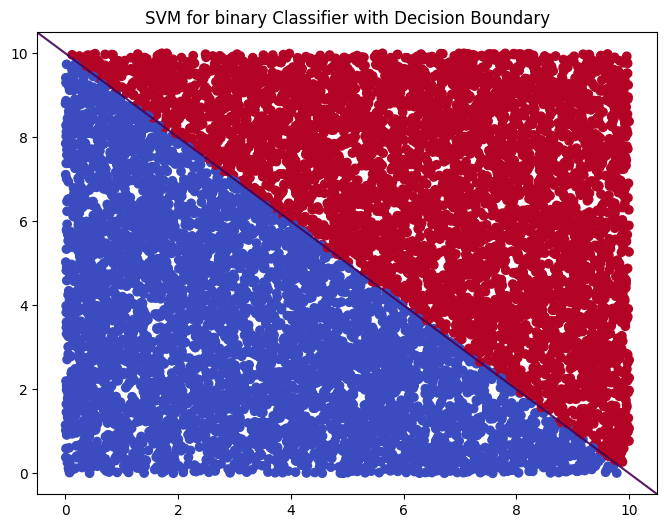

In [15]:
# Decision Boundary (DB) 
# Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "coolwarm")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
z_axis = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
z_axis = z_axis.reshape(xx.shape)
plt.contour(xx, yy, z_axis, color = "k",levels = [0], alpha = 0.9, linstyles = ['-'])
plt.title("SVM for binary Classifier with Decision Boundary")
plt.show()

In [13]:
datasets = pd.DataFrame({"X1" : X[:, 0], "X2" : X[:, 1], "Y" : y})
datasets.head()

X1        X2  Y
0  5.488135  7.151894  1
1  6.027634  5.448832  1
2  4.236548  6.458941  1
3  4.375872  8.917730  1
4  9.636628  3.834415  1

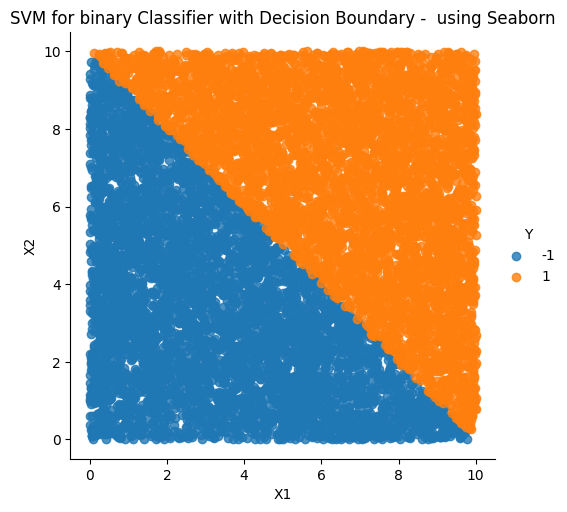

In [14]:
sns.lmplot(x = "X1", y = "X2", data = datasets, hue = "Y", fit_reg = False)
plt.title("SVM for binary Classifier with Decision Boundary -  using Seaborn")
plt.show()

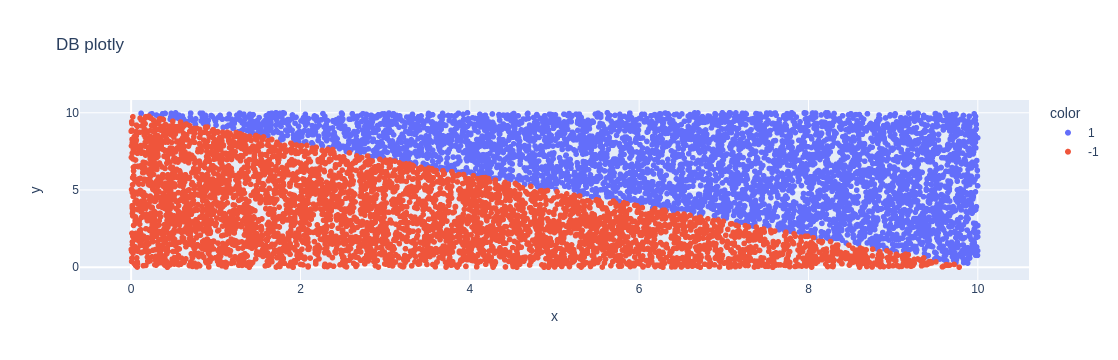

In [16]:
figure  = px.scatter(x = X[:, 0], y = X[:, 1], color = y.astype(str), title = "DB plotly")
figure.show()